In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
import plotly.graph_objects as go
import random
import math 

In [2]:
data = pd.read_excel('tech_layoffs.xlsx').drop('#', axis=1)

data

Company             Location_HQ  Country      Continent  \
0                 ShareChat               Bengaluru    India           Asia   
1                 InSightec                   Haifa   Israel           Asia   
2            Enphase Energy  San Francisco Bay Area      USA  North America   
3                     Udaan               Bengaluru    India           Asia   
4                    Cruise  San Francisco Bay Area      USA  North America   
...                     ...                     ...      ...            ...   
1413                  Pitch                  Berlin  Germany         Europe   
1414               BenchSci                 Toronto   Canada  North America   
1415  NanoString Technology                 Seattle      USA  North America   
1416                  Trigo                Tel Aviv   Israel           Asia   
1417              Frontdesk               Milwaukee      USA  North America   

      Laid_Off Date_layoffs  Percentage  Company_Size_before_Layoffs  \
0          200   2023-12-20        15.0                         1333   
1          100   2023-12-19        20.0                          500   
2          350   2023-12-18        10.0                         3500   
3          100   2023-12-18        10.0                         1000   
4          900   2023-12-14        24.0                         3750   
...        ...          ...         ...                          ...   
1413        80   2024-08-01        67.0                          119   
1414        70   2024-08-01        17.0                          412   
1415        50   2024-08-01         9.0                          556   
1416        30   2024-04-01        15.0                          200   
1417       200   2024-02-01       100.0                          200   

      Company_Size_after_layoffs        Industry     Stage  \
0                           1133        Consumer  Series H   
1                            400      Healthcare   Unknown   
2                           3150          Energy  Post-IPO   
3                            900          Retail   Unknown   
4                           2850  Transportation  Acquired   
...                          ...             ...       ...   
1413                          39           Other  Series B   
1414                         342      Healthcare  Series D   
1415                         506      Healthcare  Post-IPO   
1416                         170          Retail  Series C   
1417                           0          Travel   Unknown   

     Money_Raised_in_$_mil  Year       lat        lng  
0                    $1700  2023  12.97194   77.59369  
1                     $733  2023  32.81841   34.98850  
2                     $116  2023  37.54827 -121.98857  
3                     1500  2023  12.97194   77.59369  
4                   $15000  2023  37.77493 -122.41942  
...                    ...   ...       ...        ...  
1413                  $138  2024  52.52437   13.41053  
1414                  $164  2024  43.70643  -79.39864  
1415                  $826  2024  47.60621 -122.33207  
1416                  $199  2024  32.08088   34.78057  
1417                   $26  2024  43.03890  -87.90647  

[1418 rows x 15 columns]

In [3]:
#Basic Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1418 entries, 0 to 1417

Data columns (total 15 columns):

 #   Column                       Non-Null Count  Dtype         

---  ------                       --------------  -----         

 0   Company                      1418 non-null   object        

 1   Location_HQ                  1418 non-null   object        

 2   Country                      1418 non-null   object        

 3   Continent                    1418 non-null   object        

 4   Laid_Off                     1418 non-null   int64         

 5   Date_layoffs                 1418 non-null   datetime64[ns]

 6   Percentage                   1418 non-null   float64       

 7   Company_Size_before_Layoffs  1418 non-null   int64         

 8   Company_Size_after_layoffs   1418 non-null   int64         

 9   Industry                     1418 non-null   object        

 10  Stage                        1418 non-null   object        

 11  Money_Raised_in_$_mil      

In [4]:
#Check Null Values
data.isna().sum()

#Check Duplicate Values
data.duplicated().sum()

data.loc[data.duplicated()] 

data.duplicated(subset='Company').sum()
#Multiple companies has many layoffs throughout the timeline, thus not considered duplicated data here

290

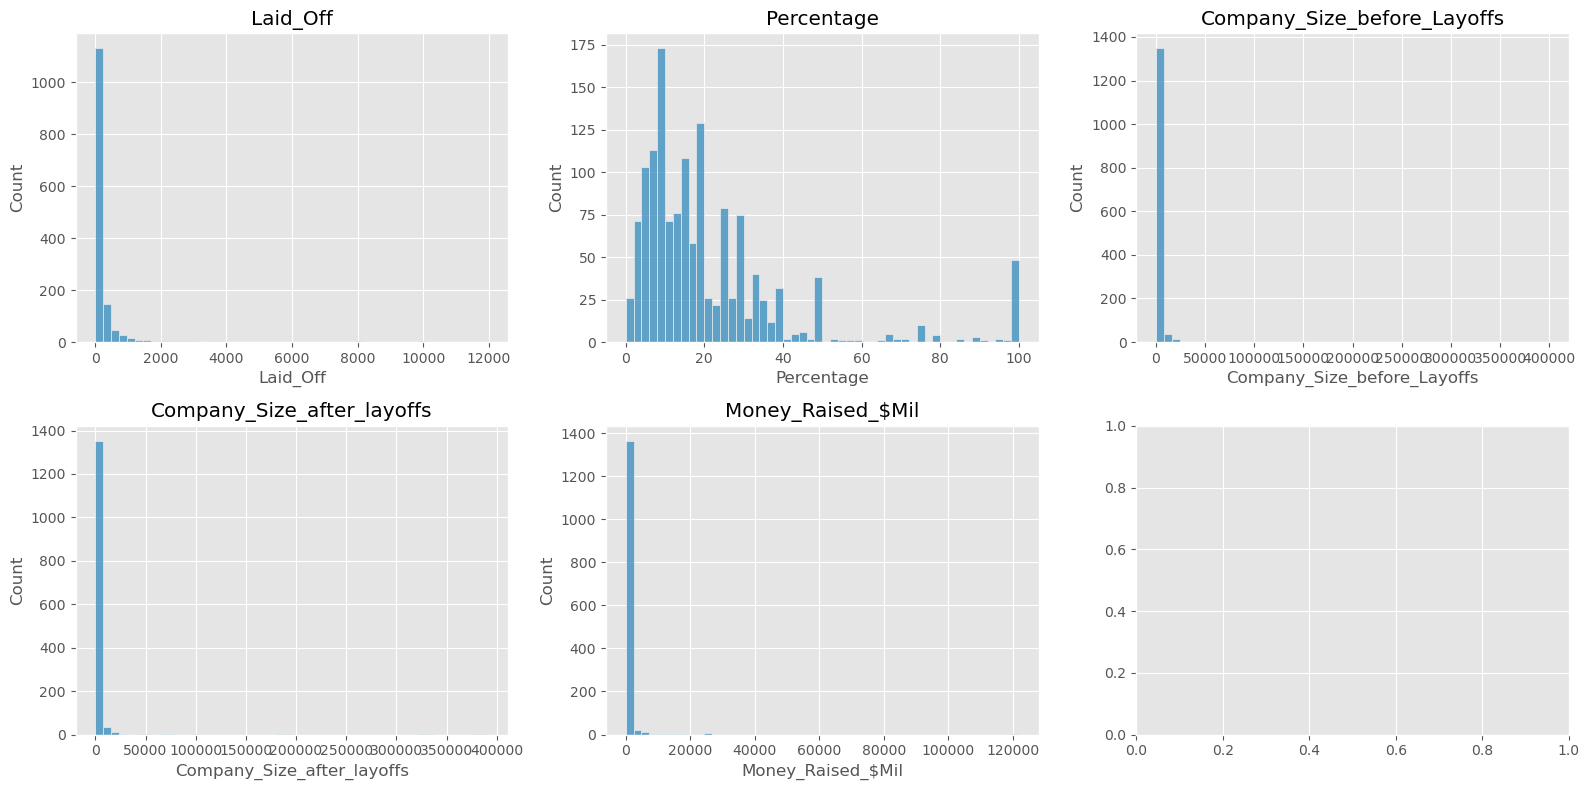

In [5]:
#General Visual of numerical columns with histogram

#Reformat 'Money_Raised_in_$_mil' and change the data type
data['Money_Raised_$Mil'] = data['Money_Raised_in_$_mil'].str.replace('$', '').astype('float')
data = data.drop('Money_Raised_in_$_mil', axis=1)

#Filter all numerical columns to plot
blanks=['lat', 'lng', 'Year', 'Date_layoffs']
num_cols = [col for col in data.columns if data[col].dtype != 'object' and col not in blanks]

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data[col], ax=axs[i], bins=50)
    axs[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

In [6]:
#Check unique values in each categorical columns
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in cat_cols:
    if col != 'Company':
        print(col)
        print(data[col].unique())
        print('\n')

Location_HQ

['Bengaluru' 'Haifa' 'San Francisco Bay Area' 'New York City' 'Seattle'

 'Tel Aviv' 'Stockholm' 'Mumbai' 'London' 'Detroit' 'Noida' 'Boston'

 'San Diego' 'Los Angeles' 'Austin' 'Calgary' 'Paris' 'Amsterdam'

 'Kansas City' 'Salt Lake City' 'Montreal' 'Raleigh' 'Saskatoon' 'Denver'

 'Berlin' 'Portland' 'Chicago' 'Tallinn' 'Nairobi' 'Santa Barbara'

 'Atlanta' 'Toronto' 'Gurugram' 'Sao Paulo' 'Auckland' 'Tampa Bay'

 'Dublin' 'Miami' 'Chennai' 'Sydney' "Ra'anana" 'Singapore' 'Fresno'

 'Washington DC' 'Phoenix' 'Melbourne' 'Baltimore' 'Vancouver' 'Kfar Saba'

 'Santiago' 'Ottawa' 'Dallas' 'Brisbane' 'Cincinnati' 'Madrid'

 'Philadelphia' 'Nashua' 'Chester' 'Madison' 'Kitchener' 'Minneapolis'

 'Wellington' 'Pune' 'Walnut' 'Seoul' 'Boise' 'Jakarta' 'Columbus'

 'Frankfurt' 'Barcelona' 'Karlsruhe' 'Walldorf' 'Kiel' 'Oxford' 'Boulder'

 'Wilmington' 'Tokyo' 'Nashville' 'Bejing' 'Reno' 'Hamburg' 'Munich'

 'Waterloo' 'Burlington' 'Sacramento' 'Buenos Aires' 'Lagos' 'Dubai'

 

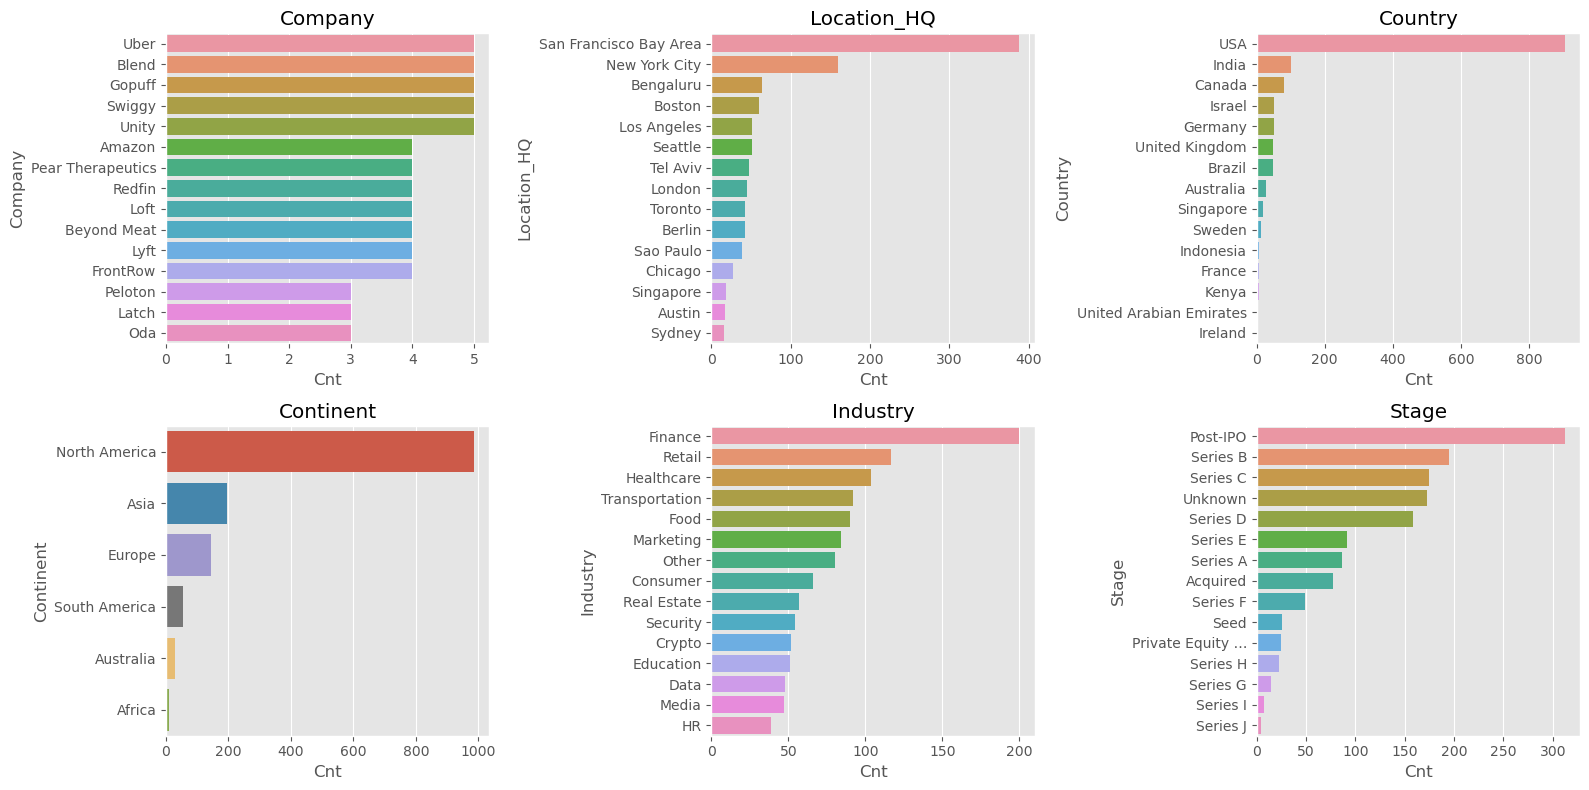

In [7]:
#General Visual of categorical columns with barplots

#Top 15 values in each variable in cat_col with most value_counts
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    df = data[col].value_counts().reset_index().nlargest(15, col)
    df.columns = [col, 'Cnt']
    
    sns.barplot(data=df, 
               x='Cnt',
               y=col,
               ax=axs[i])
    axs[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

Year (Country + Industry) Level Analysis

Overall Trend of Layoff Cnt in Each Country each Year

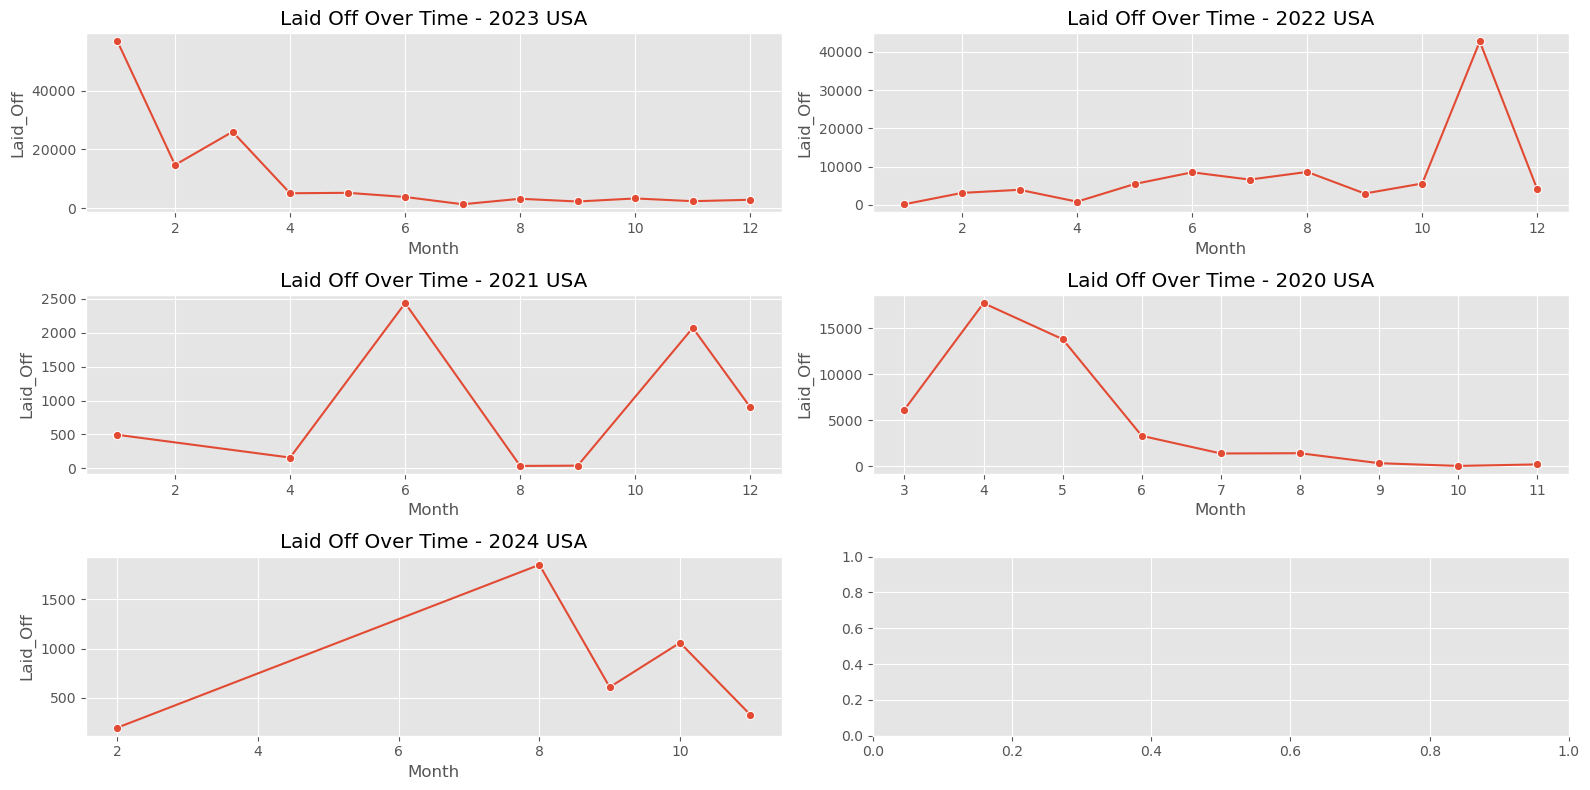

In [8]:
#Function to Create Line chart of overall trend of layoff Cnt in Each country each year

def year_trend(country):
    #Filter the USA data
    Country = data.loc[data['Country']==country]

    fig, axs = plt.subplots(3, 2, figsize=(16, 8))
    axs = axs.flatten()

    #Plot the visuals
    for i, year in enumerate(Country.Year.unique()):
        df = Country.loc[Country['Year']==year]
        df['Month']= df['Date_layoffs'].dt.month

        df=df.groupby('Month')['Laid_Off'].sum().reset_index()

        sns.lineplot(data=df, x='Month', y='Laid_Off', ax=axs[i], marker='o')
        axs[i].set_title(f'Laid Off Over Time - {year} {country}')

    plt.tight_layout()
    plt.show()

# year_trend('India')
year_trend('USA')

Top 10 Companies with Most Layoff in Each Country in Each Year

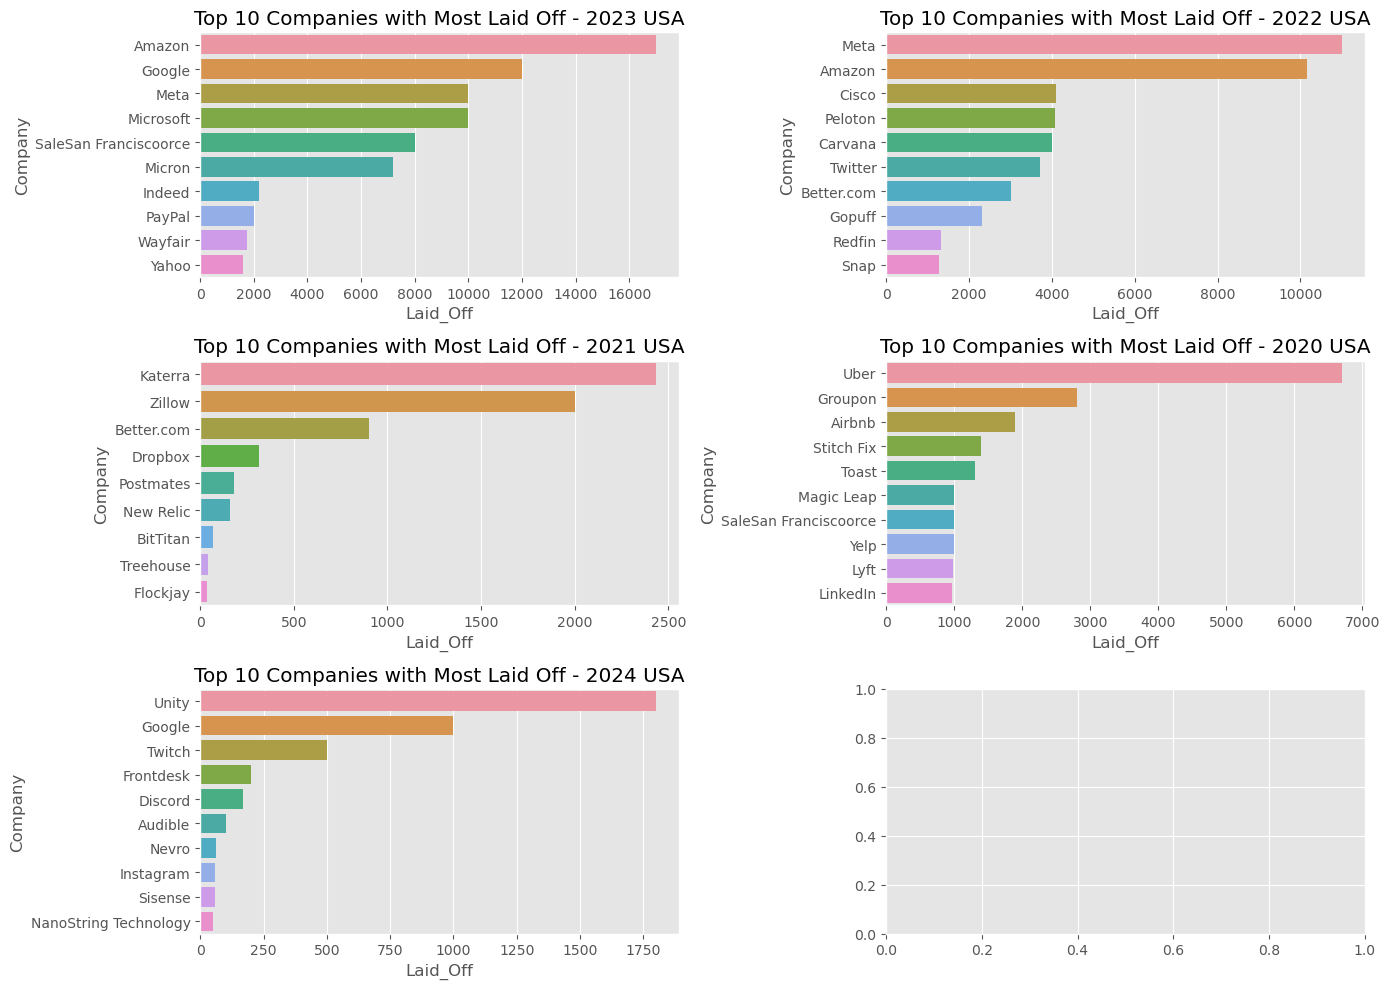

In [9]:
#Top 10 companies with most layoff in each country in each year

def top_10_companies_year(country):
    Country = data.loc[data['Country']==country]

    fig, axs = plt.subplots(3, 2, figsize=(14, 10))
    axs = axs.flatten()

    #Plot the visuals
    for i, year in enumerate(Country.Year.unique()):
        df = Country.loc[Country['Year']==year]
        df = df.groupby('Company')['Laid_Off'].sum().nlargest(10).reset_index()
        
        sns.barplot(data=df, 
                   y='Company',
                   x='Laid_Off',
                   ax=axs[i])
        axs[i].set_title(f'Top 10 Companies with Most Laid Off - {year} {country}')
    
    plt.tight_layout()
    plt.show()

# top_10_companies_year('India')  
top_10_companies_year('USA')

Top 10 Industries with Most Laid Off Employees in Each Year

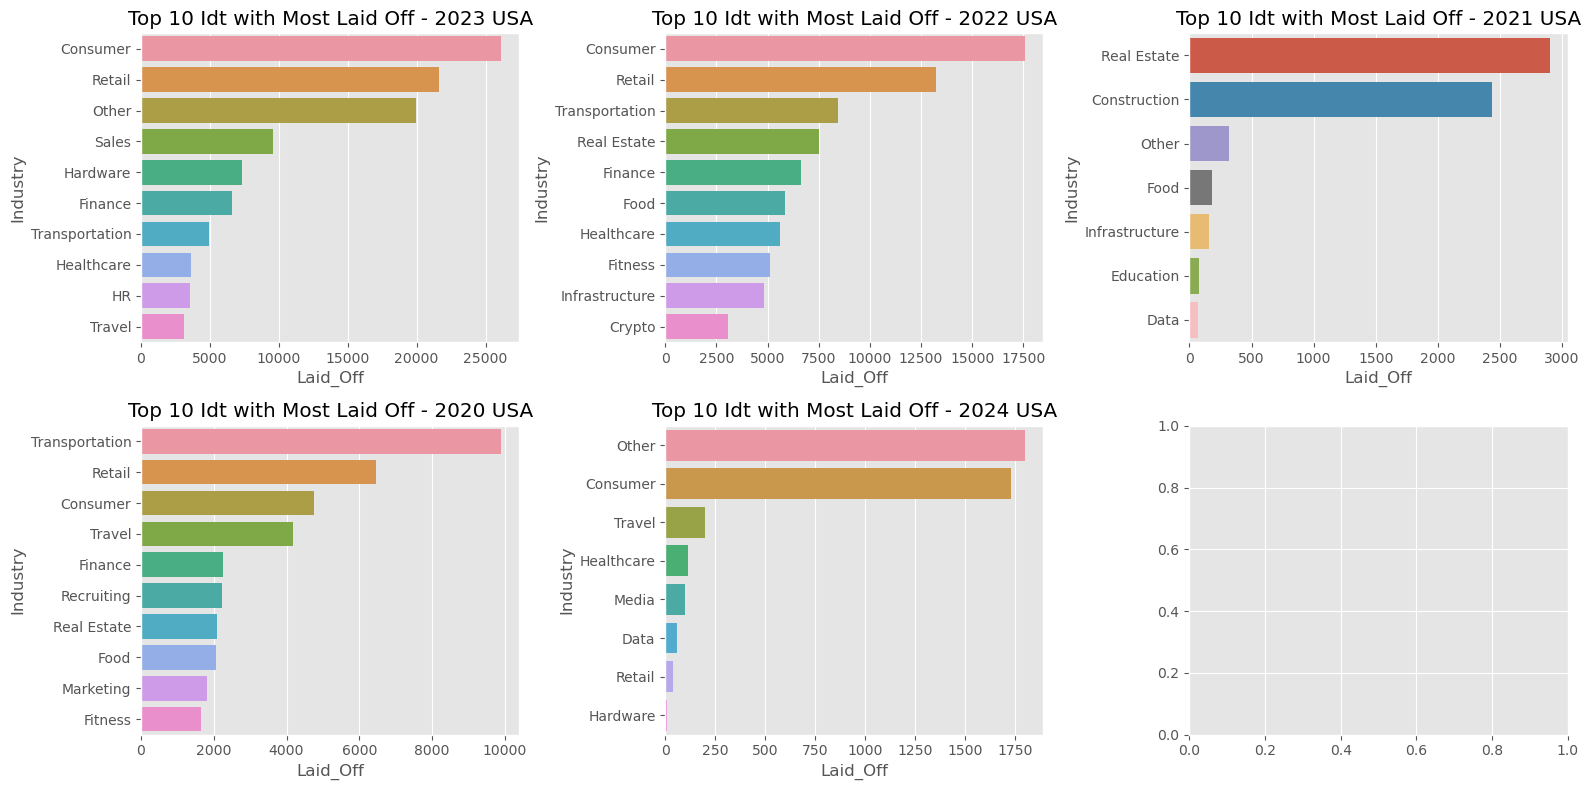

In [10]:
# Top 10 Industries with Most Laid Off Employees in Each Year
def top10_industries_year(country):
    
    Country = data.loc[data['Country']==country]
    
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))
    axs = axs.flatten()

    for i, year in enumerate(data.Year.unique()):
        df = Country.loc[Country['Year']==year]
        df=df.groupby('Industry')['Laid_Off'].sum().nlargest(10).reset_index()

        sns.barplot(data=df, 
                   y='Industry',
                   x='Laid_Off',
                   ax=axs[i])
        axs[i].set_title(f'Top 10 Idt with Most Laid Off - {year} {country}')

    plt.tight_layout()
    plt.show()
    
# top10_industries_year('India')
top10_industries_year('USA')

Company Level Analysis

Top 10 Companies with Most Layoff in Each Country

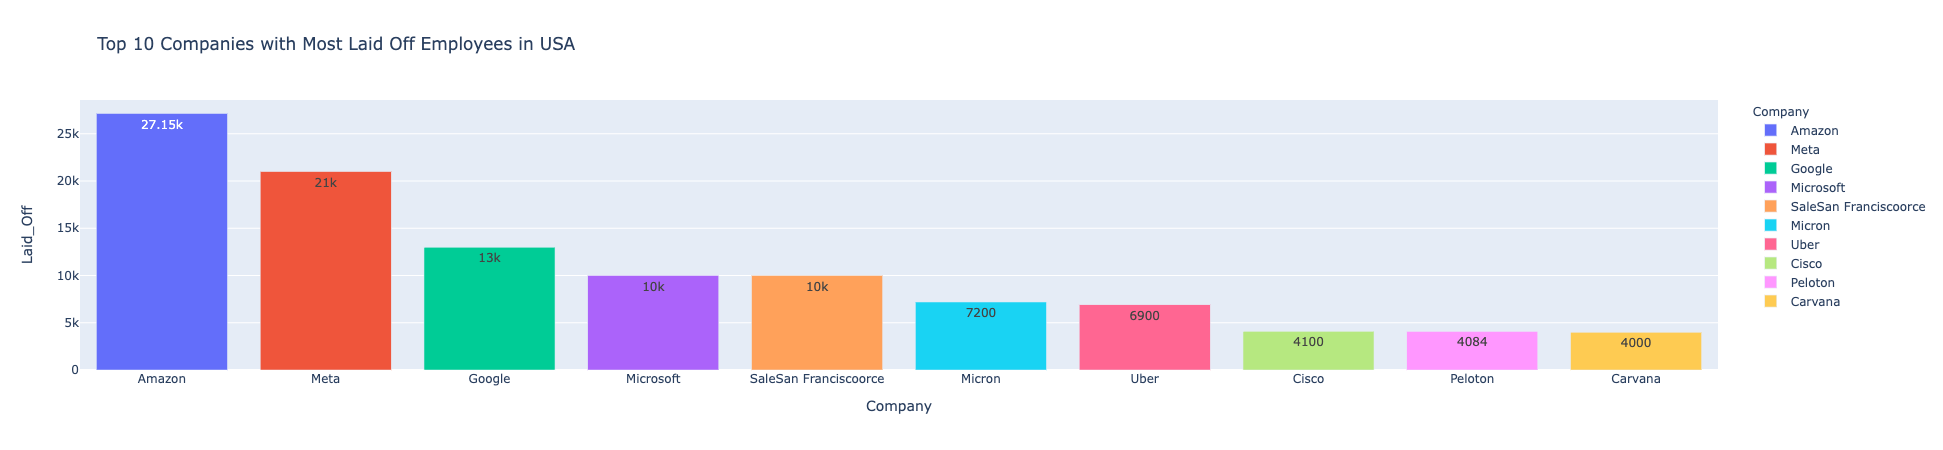

In [11]:
#Top 10 Companies with Most Layoff in Each Country
def top_10_companies(country):
    df = data.loc[data['Country']==country]
    df = df.groupby('Company')['Laid_Off'].sum().nlargest(10).reset_index()
    fig = px.bar(df, x='Company', 
           y='Laid_Off', 
           color='Company', 
           text_auto=True,
          title=f'Top 10 Companies with Most Laid Off Employees in {country}')
    return fig

# top_10_companies('Canada')
top_10_companies('USA')

Company Layoff Percentage Category Value Counts in Each Country

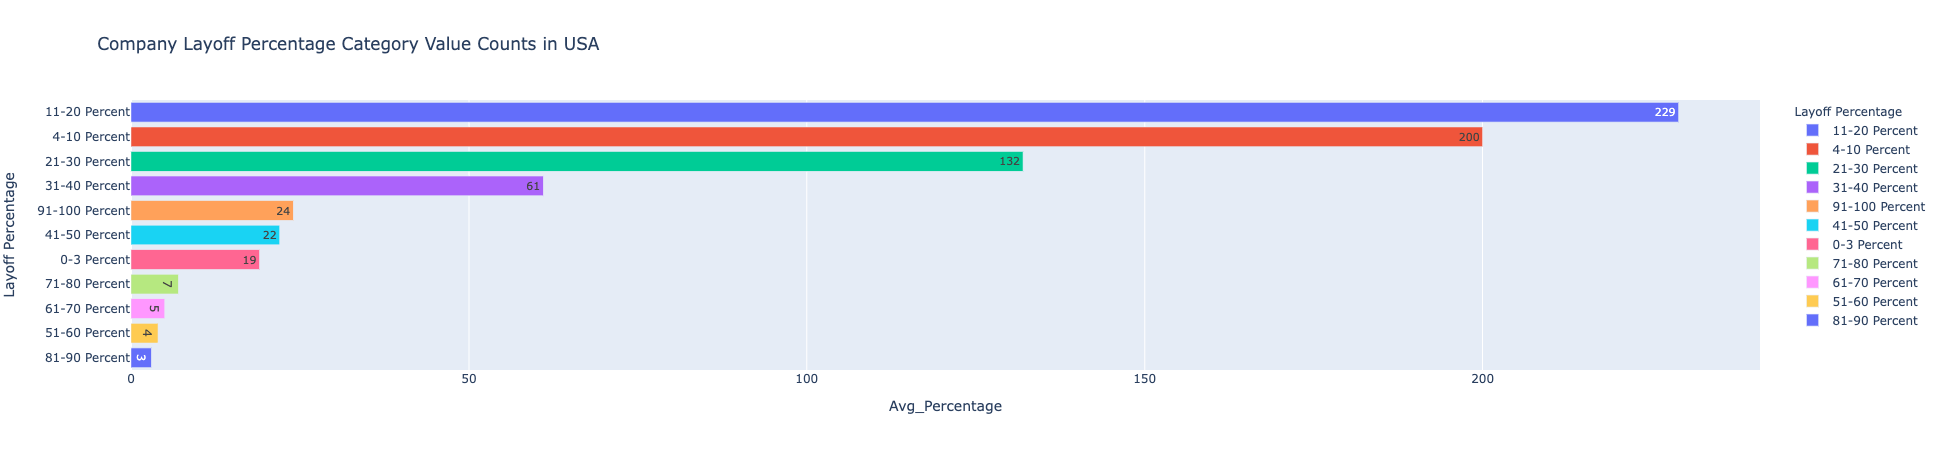

In [12]:
#Company Layoff Percentage Category Value Counts in each Country

def percentage_category(country):
    #Filter the selected country
    Country = data.loc[data['Country']==country]
    #Calculate the mean
    df = Country.groupby('Company')['Percentage'].mean().reset_index().sort_values('Percentage', ascending=False)

    #Create a function to categorize different layoff percentage
    def category(col):
        blanks = []
        for num in df.Percentage:
            if num >= 0 and num <= 3:
                blanks.append('0-3 Percent')
            elif num > 3 and num <= 10:
                blanks.append('4-10 Percent')
            elif num > 10 and num <= 20:
                blanks.append('11-20 Percent')
            elif num > 20 and num <= 30:
                blanks.append('21-30 Percent')
            elif num > 30 and num <= 40:
                blanks.append('31-40 Percent')
            elif num > 40 and num <= 50:
                blanks.append('41-50 Percent')
            elif num > 50 and num <= 60:
                blanks.append('51-60 Percent')
            elif num > 60 and num <= 70:
                blanks.append('61-70 Percent')
            elif num > 70 and num <= 80:
                blanks.append('71-80 Percent')
            elif num > 80 and num <= 90:
                blanks.append('81-90 Percent')
            elif num > 90 and num <= 100:
                blanks.append('91-100 Percent')
            else:
                blanks.append('Other')
        return blanks

    #Apply to the 'Percentage' Column
    df['Avg_Percentage']=category(df['Percentage'])

    #Value count of each percentage category
    df=df['Avg_Percentage'].value_counts().reset_index().rename(columns={'index':'Layoff Percentage'})

    #Plot the visuals
    fig = px.bar(
               df, y='Layoff Percentage', x='Avg_Percentage', color='Layoff Percentage', text_auto=True,
                title=f'Company Layoff Percentage Category Value Counts in {country}'
            )
    
    fig.show()

# percentage_category('India')
percentage_category('USA')

AVG Company Size Before / After Layoff Among Top 10 Companies with Most Layoff Employees in Each Country

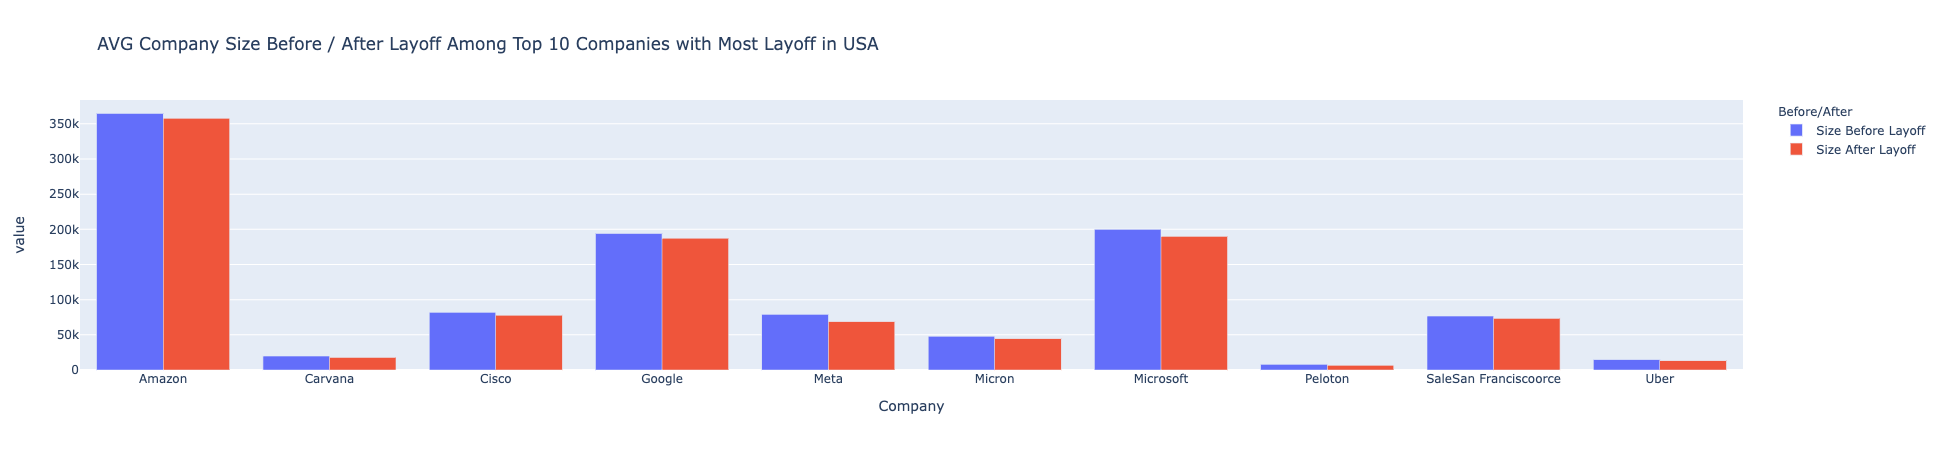

In [13]:
def before_after_layoff(country):
    df = data.loc[data['Country']==country]
    df = df.groupby('Company')['Laid_Off'].sum().nlargest(10).reset_index()
    top10_companies=df.Company.tolist()

    df = data.loc[data['Company'].isin(top10_companies)]
    df = df.groupby('Company')[['Company_Size_before_Layoffs','Company_Size_after_layoffs']].mean().reset_index()
    df.columns=['Company','Size Before Layoff', 'Size After Layoff']

    fig = px.bar(
        df, 
        x='Company',
        y=['Size Before Layoff', 'Size After Layoff'],
        barmode='group',
        title=f'AVG Company Size Before / After Layoff Among Top 10 Companies with Most Layoff in {country}'
    )
    
    fig.update_layout(legend_title_text='Before/After')
    
    fig.show()

# before_after_layoff('India')
before_after_layoff('USA')

Industy Level Analysis

Top 10 Industries with Most Laid Off Employees in Each Country

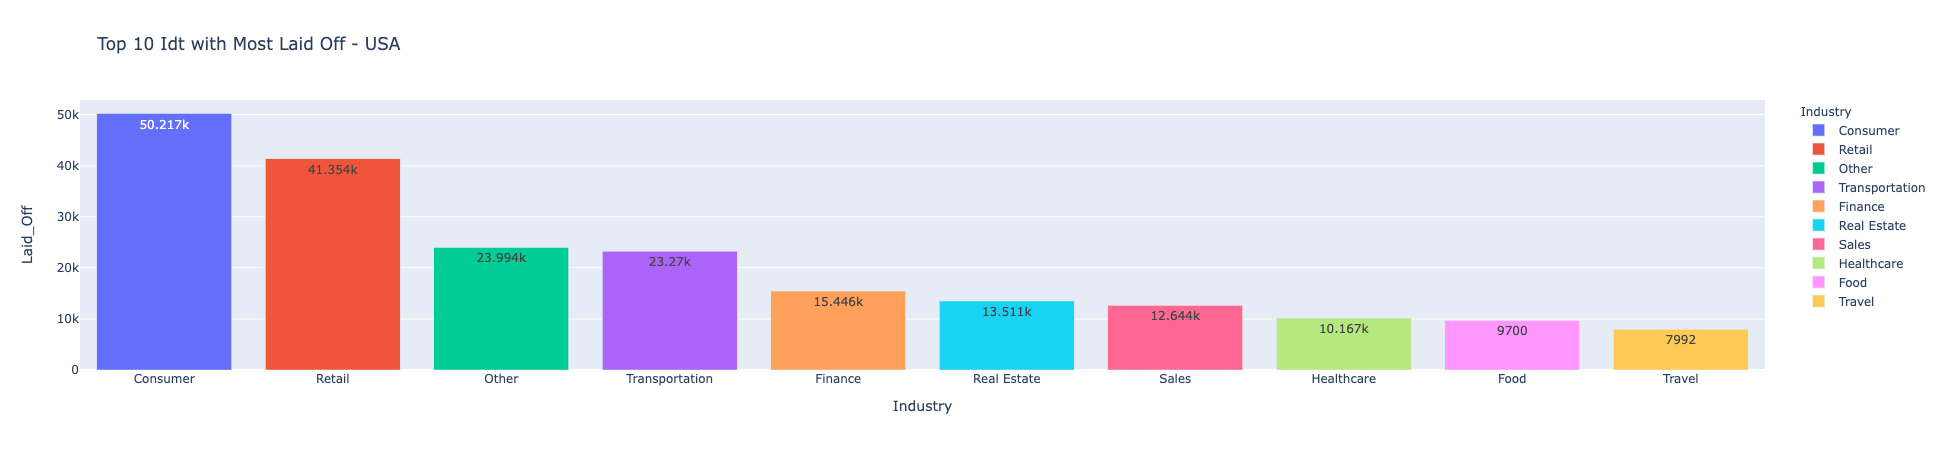

In [14]:
#Top 10 Industries with Most Laid Off Employees in each Country
def top_10_idt(country):
    Country = data.loc[data['Country']==country]

    df=Country.groupby('Industry')['Laid_Off'].sum().nlargest(10).reset_index()

    fig=px.bar(
        df, x='Industry', y='Laid_Off', color='Industry', text_auto=True,
        title=f'Top 10 Idt with Most Laid Off - {country}'
    )
    
    fig.show()
    
# top_10_idt('Germany')
top_10_idt('USA')

AVG Industry Size Before / After Layoff Among Top 10 Companies with Most Layoff Employees in Each Country

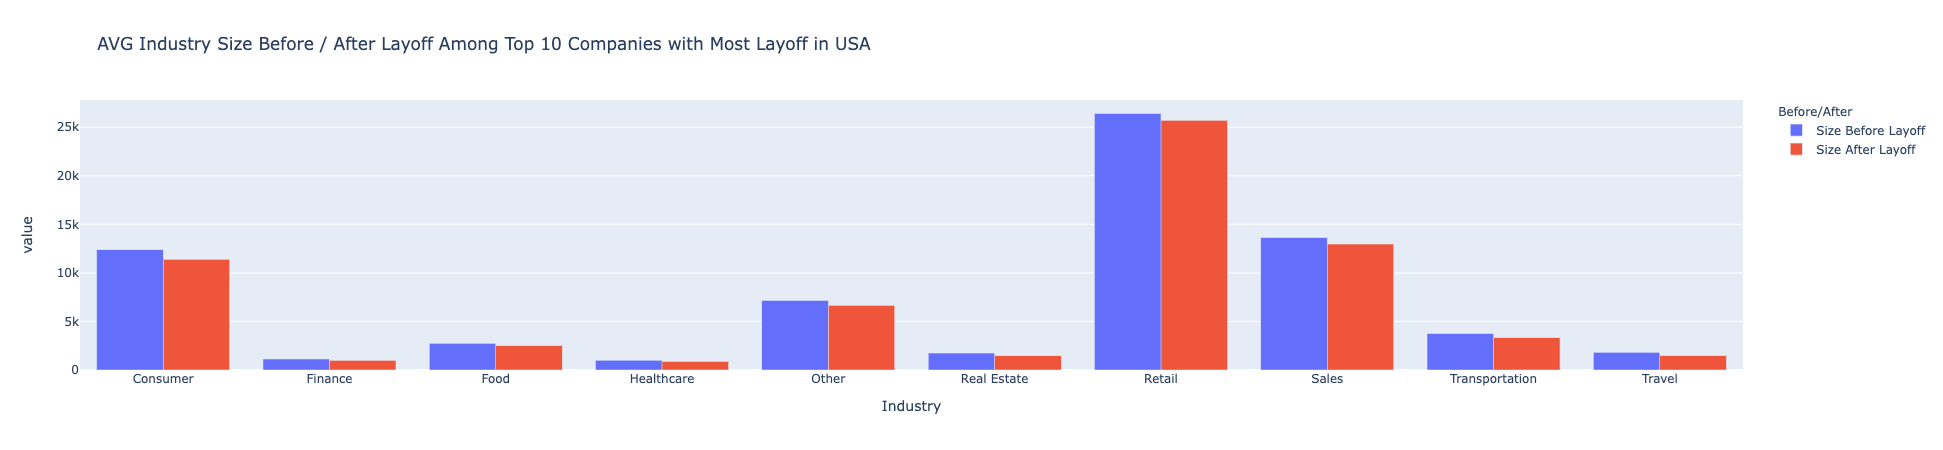

In [15]:
#AVG Industry Size Before / After Layoff Among Top 10 Companies with Most Layoff Employees in Each Country
def idt_before_after(country):
    Country = data.loc[data['Country']==country]
    df=Country.groupby('Industry')['Laid_Off'].sum().nlargest(10).reset_index()

    df = Country.loc[Country['Industry'].isin(df.Industry)]
    df = df.groupby('Industry')[['Company_Size_before_Layoffs','Company_Size_after_layoffs']].mean().reset_index()
    df.columns = ['Industry', 'Size Before Layoff', 'Size After Layoff']

    fig=px.bar(
        df, 
        x='Industry',
        y=['Size Before Layoff','Size After Layoff'],
        barmode='group',
        title=f'AVG Industry Size Before / After Layoff Among Top 10 Companies with Most Layoff in {country}'
    )

    fig.update_layout(legend_title_text='Before/After')
    fig.show()

idt_before_after('USA')